In [1]:
import numpy as np
import matplotlib.pyplot as plt

from robust_smc.data import TANSimulator, dem

%matplotlib inline

In [2]:
time = 200
time_step = 0.1
observation_std = 0.1

seed = 1992

In [3]:
process_std = None
simulator = TANSimulator(time, time_step=time_step, observation_std=observation_std,
                         process_std=process_std, seed=seed)

In [32]:
xx = np.linspace(-10000, 13000, 5000)
yy = np.linspace(-10000, 6000, 5000)

In [36]:
X, Y = np.meshgrid(xx, yy)

In [45]:
def plot_terrain(num_frequencies):
    plt.figure(figsize=(10, 6))
    Z = dem(X.flatten()[:, None], Y.flatten()[:, None], num_frequencies=num_frequencies)
    Z = Z.reshape(5000, 5000)
    levels = np.arange(-1000, 1001, 250)
    plt.contourf(X, Y, Z, levels=levels)
    plt.colorbar()
    plt.scatter(simulator.X[1:, 0], simulator.X[1:, 1], c=np.arange(0, time, time_step), cmap='Reds')
    plt.colorbar()
    plt.title(f'Frequencies = {num_frequencies}')

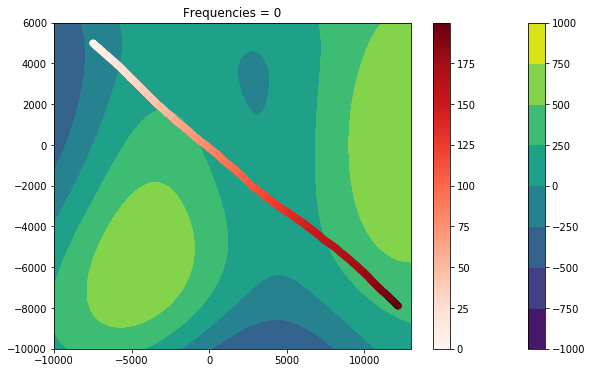

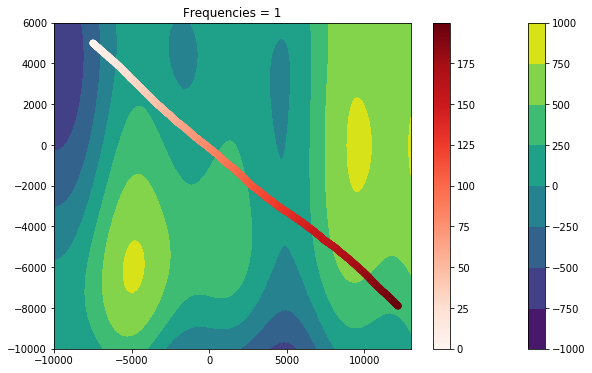

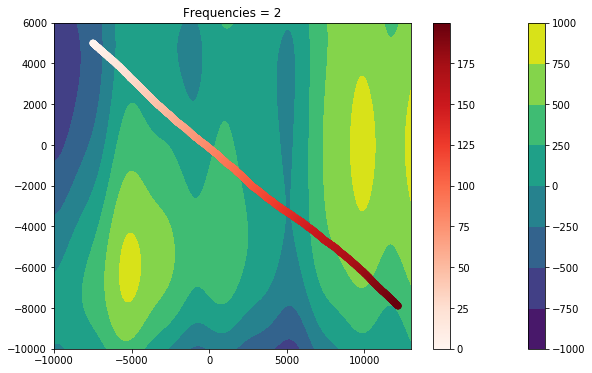

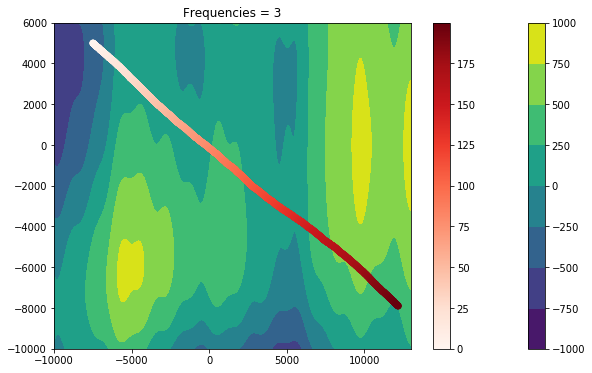

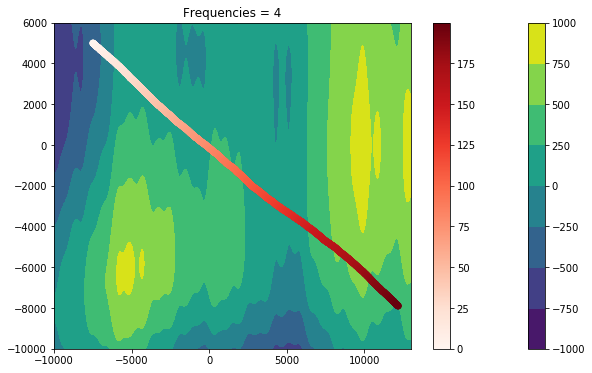

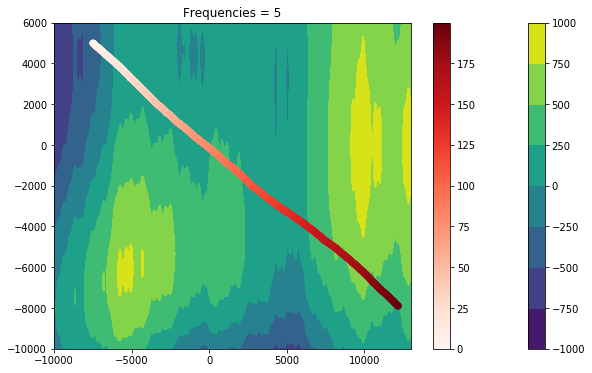

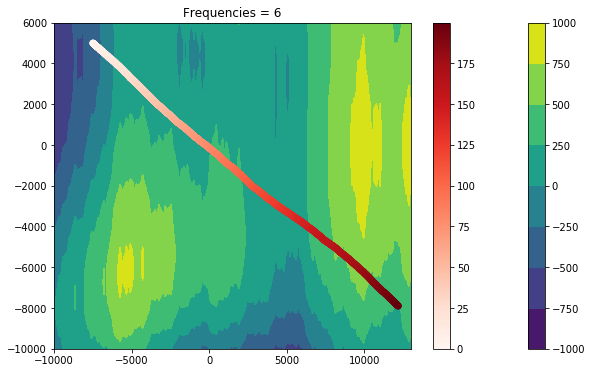

In [47]:
for num_frequencies in range(7):
    plot_terrain(num_frequencies)

In [63]:
levels = np.arange(-1000, 1001, 250)
Z = dem(X.flatten()[:, None], Y.flatten()[:, None], num_frequencies=1)
Z = Z.reshape(5000, 5000)
idx = np.digitize(Z, levels)
lookup = np.arange(-1250 , 1251, 250)
ZZ = lookup[idx]

In [ ]:
def piecewise_dem(X, Y, num_frequencies):
    levels = np.arange(-1000, 1001, 250)
    Z = dem(X, Y, num_frequencies=num_frequencies)
    idx = np.digitize(Z, levels)
    lookup = np.arange(-1250 , 1251, 250)
    ZZ = lookup[idx]
    return ZZ